#  Sentimental Analysis Model (Based on Amazon Order Reviews)

#### Hello Everyone! Myself Yashank Rajvanshi, an enthusiast Data Analytics Engineer with an experience of more than 4 years in this field and having knowlegde of Python, PowerBI, DAX, VBA, Advanced Excel, Artificial Intelligence, Preprocessing Tools, Machine Learning. I am currently in my Final of year B.Tech Degree. My dicipline is Information Technology (IT). I have completed various projects and a 5 month internship experience as Data Analytics Intern at Kashsam Data Solutions. 

#### For more information, you can access my resume through below link:
#### 


## Code Explanation: Sentiment Analysis Model Using Naive Bayes, MultinomialNB, BernoulliNB, and Logistic Regression
#### 1. Importing Libraries
Essential libraries like pandas, NumPy, and NLTK are imported for data manipulation and natural language processing.
scikit-learn is used for model training, evaluation, and data vectorization. Matplotlib and seaborn are imported for visualizations, and SHAP for feature importance analysis.
#### 2. Loading and Filtering Data
The dataset 1429_1.csv is loaded into the temp DataFrame.
A subset of columns (reviews.rating, reviews.text, reviews.title, reviews.username) is selected and stored in the permanent DataFrame.
Null values are checked, and rows without reviews.rating are filtered into check, while rows with valid ratings are stored in senti.
#### 3. Classifying Reviews as Positive or Negative
The senti DataFrame is updated with a new column senti, where reviews with a rating of 4 or above are classified as "positive" (pos), and others as "negative" (neg).
A bar chart visualizes the count of positive and negative reviews.
#### 4. Text Cleaning
The cleanup function is defined to clean the review text by converting it to lowercase and removing non-alphabetical characters.
The cleaned text is stored in the Summary_Clean column for both senti and check DataFrames.
#### 5. Splitting Training and Testing Data
The data is split into training (80%) and testing (20%) sets using train_test_split.
The text is tokenized into words and stored in the words column for both training and test datasets.
#### 6. Feature Extraction for Naive Bayes Classifier
A feature extractor function word_feats is defined to represent words as features for the Naive Bayes classifier.
The training, test, and check datasets are prepared using the feature extractor.
#### 7. Training Naive Bayes Classifier
The NLTK NaiveBayesClassifier is trained on the extracted features.
The accuracy is printed, and the most informative features are displayed.
#### 8. Predicting Sentiment Using Naive Bayes
Sentiment is predicted for both the test and check datasets using the Naive Bayes classifier.
#### 9. TF-IDF and CountVectorizer
A CountVectorizer and TfidfTransformer are used to vectorize the text and compute the term frequency-inverse document frequency (TF-IDF).
Training, test, and check datasets are transformed into TF-IDF matrices for further model training.
#### 10. Multinomial Naive Bayes Model
The MultinomialNB classifier is trained on the TF-IDF vectors and the training dataset's sentiment labels.
The accuracy is calculated, and the predicted sentiment is stored for comparison.
The check dataset sentiment is predicted.
#### 11. Bernoulli Naive Bayes Model
The BernoulliNB classifier is trained similarly to the MultinomialNB model, using binary features (whether a word appears or not).
Accuracy and predicted sentiment are calculated for the test and check datasets.
#### 12. Logistic Regression Model
Logistic Regression is trained on the TF-IDF features.
The model's accuracy is printed, and predicted sentiment is stored for the test and check datasets.
#### 13. Most Occurring Words in Training Data
The most common words and their coefficients (importance) are extracted and displayed for Logistic Regression.
The top 10 most positively and negatively influential features are printed.
#### 14. ROC Curves for Classifier Comparison
The ROC (Receiver Operating Characteristic) curve is plotted for the MultinomialNB, BernoulliNB, and Logistic Regression models to compare their performance using the area under the curve (AUC).
#### 15. Precision and Recall for Classifiers
The precision and recall metrics for each classifier are calculated and displayed.
#### 16. Testing Classifiers on Sample Reviews
Sample product reviews are tested using Logistic Regression to see if the classifier can correctly predict their sentiment.
#### 17. WordCloud for Visualization
WordClouds are generated to visualize the most frequent words in the entire dataset, as well as for positive and negative reviews.
#### 18. Precision-Recall Curves
Precision-Recall curves are plotted to evaluate the trade-off between precision and recall for each classifier.
#### 19. Sentiment Distribution
A pie chart is plotted to show the distribution of positive and negative reviews in the dataset.
#### 20. Learning Curve
The learning curve for Logistic Regression is plotted to observe the performance on both the training and validation datasets as the size of the training data increases.
#### 21. Model Calibration Curves
Calibration curves are plotted to check how well the predicted probabilities match the true outcomes for each model.
#### 22. Class Imbalance Analysis
The class distribution of positive and negative sentiments in both the training and test datasets is visualized using bar charts.
#### 23. Misclassification Analysis
Misclassified examples (where the true sentiment does not match the predicted sentiment) are identified and printed.
#### 24. Feature Correlation Analysis
The correlation of the most important features (from Logistic Regression) with sentiment is analyzed and visualized using a bar plot.
#### 25. SHAP Values for Feature Importance
SHAP (SHapley Additive exPlanations) values are calculated to explain feature importance for the Logistic Regression model, and a summary plot is displayed.
#### 26. Error Analysis: Precision and Recall for Each Model
The precision, recall, and F1-score metrics are calculated for each model to evaluate their performance on the test data.
### This detailed explanation covers the entire code and its components, including data preprocessing, model training, performance evaluation, and visualization.

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [3]:
temp = pd.read_csv(r"1429_1.csv")
temp.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_2312\2166356794.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(r"1429_1.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
permanent = temp[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
print(permanent.isnull().sum()) #Checking for null values
permanent.head()

reviews.rating      33
reviews.text         1
reviews.title        6
reviews.username     7
dtype: int64


,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


### Filtering Null Values

In [5]:
check =  permanent[permanent["reviews.rating"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
2886,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley
2887,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2888,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich
2889,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2890,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton


### Filtering Not Null Values

In [6]:
senti= permanent[permanent["reviews.rating"].notnull()]
permanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


### Classfying Text as Positive & Negative

In [7]:
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

C:\Users\asus\AppData\Local\Temp\ipykernel_2312\2314567631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["senti"] = senti["reviews.rating"]>=4
C:\Users\asus\AppData\Local\Temp\ipykernel_2312\2314567631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])


### Count of Reviews

<Axes: xlabel='senti'>

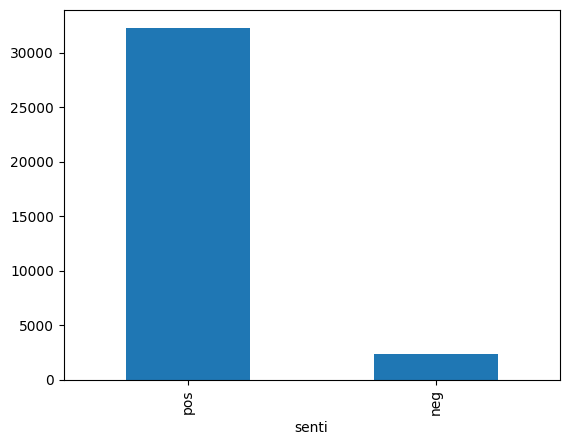

In [8]:
senti["senti"].value_counts().plot.bar()

### Cleaning Text

In [9]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)
check["Summary_Clean"] = check["reviews.text"].apply(cleanup)

C:\Users\asus\AppData\Local\Temp\ipykernel_2312\945108329.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)
C:\Users\asus\AppData\Local\Temp\ipykernel_2312\945108329.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Summary_Clean"] = check["reviews.text"].apply(cleanup)


### Splitting Training & Testing Data

In [10]:
split = senti[["Summary_Clean" , "senti"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

### Feature Extracter for NLTK Naive bayes classifier

In [11]:
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features

In [12]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
check["words"] = check["Summary_Clean"].str.lower().str.split()

train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])
prediction =  {} ## For storing results of different classifiers

train_naive = []
test_naive = []
check_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]


classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

C:\Users\asus\AppData\Local\Temp\ipykernel_2312\1233231043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["words"] = check["Summary_Clean"].str.lower().str.split()


NLTK Naive bayes Accuracy : 0.5897472924187726
Most Informative Features
                 deleted = True              neg : pos    =     51.3 : 1.0
                 warning = True              neg : pos    =     51.3 : 1.0
                    bent = True              neg : pos    =     42.0 : 1.0
                    nope = True              neg : pos    =     42.0 : 1.0
                  rotate = True              neg : pos    =     42.0 : 1.0


### Predicting Result of NLTK Classifier

In [13]:
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i] )]

check["Naive"] = y1

C:\Users\asus\AppData\Local\Temp\ipykernel_2312\4099987593.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Naive"] = y1


### Countvector and Tfidf Vector for Training, Testing & Checking Data

In [14]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Convert STOPWORDS set to a list, after modifying it
stopwords = list(STOPWORDS)
stopwords.remove("not")  # Ensuring "not" is included in the analysis

# Initialize CountVectorizer with the corrected stopwords list
count_vect = CountVectorizer(min_df=2, stop_words=stopwords, ngram_range=(1, 2))
tfidf_transformer = TfidfTransformer()

# Fit and transform the training data
X_train_counts = count_vect.fit_transform(train["Summary_Clean"])
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Transform the test and check datasets
X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(check["Summary_Clean"])
checktfidf = tfidf_transformer.transform(checkcounts)


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


### Fitting Multinomial NB

In [15]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"])
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"])))

check["multi"] = model1.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Multinomial Accuracy : 0.9329963898916968


C:\Users\asus\AppData\Local\Temp\ipykernel_2312\1663165672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["multi"] = model1.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating


### Fitting Bernoulli NB

In [16]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"])
prediction['Bernoulli'] = model2.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["senti"])))

check["Bill"] = model2.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Bernoulli Accuracy : 0.9204332129963899


C:\Users\asus\AppData\Local\Temp\ipykernel_2312\1792653343.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Bill"] = model2.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating


### Fitting Logistic Regression

In [17]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["senti"])))

check["log"] = logreg.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Logistic Regression Accuracy : 0.9367509025270758


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\AppData\Local\Temp\ipykernel_2312\165588235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["log"] = logreg.predict(checktfidf)## Predicting Sentiment for Check which was Null values for ra

### Most Occuring Words in Training Data

In [18]:
words = count_vect.get_feature_names_out()  # Updated method
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef']
)
feature_coefs.sort_values(by="coef")


,feature,coef
42481,terrible,-20.594314
48056,will definitely,-19.756054
10647,done great,-19.517477
38807,slow,-18.868244
18450,great year,-18.252242
...,...,...
32876,probably wouldn,15.790211
28400,not disappointed,16.208597
30972,perfect,17.632826
17859,great,18.503516


### Classifier Tasks

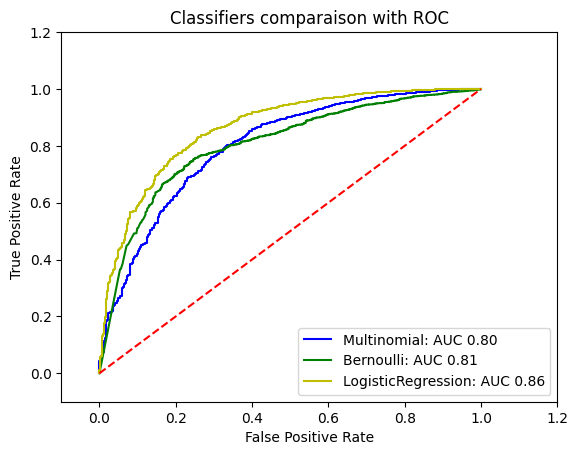

In [19]:
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision & Recall of Different Classifiers

In [20]:
test.senti = test.senti.replace(["pos" , "neg"] , [True , False] )

In [21]:
keys = prediction.keys()
for key in ['Multinomial', 'Bernoulli', 'LogisticRegression']:
    print(" {}:".format(key))
    print(metrics.classification_report(test["senti"], prediction.get(key)>.5, target_names = ["positive", "negative"]))
    print("\n")

 Multinomial:
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00       464
    negative       0.93      1.00      0.97      6461

    accuracy                           0.93      6925
   macro avg       0.47      0.50      0.48      6925
weighted avg       0.87      0.93      0.90      6925



 Bernoulli:
              precision    recall  f1-score   support

    positive       0.33      0.17      0.23       464
    negative       0.94      0.97      0.96      6461

    accuracy                           0.92      6925
   macro avg       0.63      0.57      0.59      6925
weighted avg       0.90      0.92      0.91      6925



 LogisticRegression:
              precision    recall  f1-score   support

    positive       0.55      0.33      0.41       464
    negative       0.95      0.98      0.97      6461

    accuracy                           0.94      6925
   macro avg       0.75      0.66      0.69      6925
weighted avg       0.93

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Testing Classifiers

In [22]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "The product was good and easy to  use")
test_sample(logreg, "the whole experience was horrible and product is worst")
test_sample(logreg, "product is not good")

Sample estimated as POS: negative prob 0.000000, positive prob 1.000000
Sample estimated as NEG: negative prob 0.994706, positive prob 0.005294
Sample estimated as NEG: negative prob 0.975594, positive prob 0.024406


### Predicited Values of Clasifiers 

In [23]:
check.head(10)

,reviews.rating,reviews.text,reviews.title,reviews.username,Summary_Clean,words,Naive,multi,Bill,log
0,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley,the kindle is my first e ink reader i own an i...,"[the, kindle, is, my, first, e, ink, reader, i...",neg,pos,neg,pos
1,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen,i m a first time kindle owner so i have nothin...,"[i, m, a, first, time, kindle, owner, so, i, h...",neg,pos,neg,pos
2,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich,update november my review is now over a year o...,"[update, november, my, review, is, now, over, ...",neg,pos,neg,pos
3,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen,i m a first time kindle owner so i have nothin...,"[i, m, a, first, time, kindle, owner, so, i, h...",neg,pos,neg,pos
4,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton,i woke up to a nice surprise this morning a ne...,"[i, woke, up, to, a, nice, surprise, this, mor...",neg,pos,neg,pos
5,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley,the kindle is my first e ink reader i own an i...,"[the, kindle, is, my, first, e, ink, reader, i...",neg,pos,neg,pos
6,NaN,UPDATE NOVEMBER 2011:br /br /My review is now ...,Kindle vs. Nook (updated),Ron Cronovich,update november br br my review is now over a ...,"[update, november, br, br, my, review, is, now...",neg,pos,neg,pos
7,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton,i woke up to a nice surprise this morning a ne...,"[i, woke, up, to, a, nice, surprise, this, mor...",neg,pos,neg,pos
8,NaN,I use to hate to read but now that I have my K...,Great,D. Tatro,i use to hate to read but now that i have my k...,"[i, use, to, hate, to, read, but, now, that, i...",pos,pos,pos,pos
9,NaN,All of them quit working. There's absolutely n...,I've had 3!,M. Lansford Kindle fave,all of them quit working there s absolutely no...,"[all, of, them, quit, working, there, s, absol...",neg,pos,pos,pos


### Wordcloud (Summary)

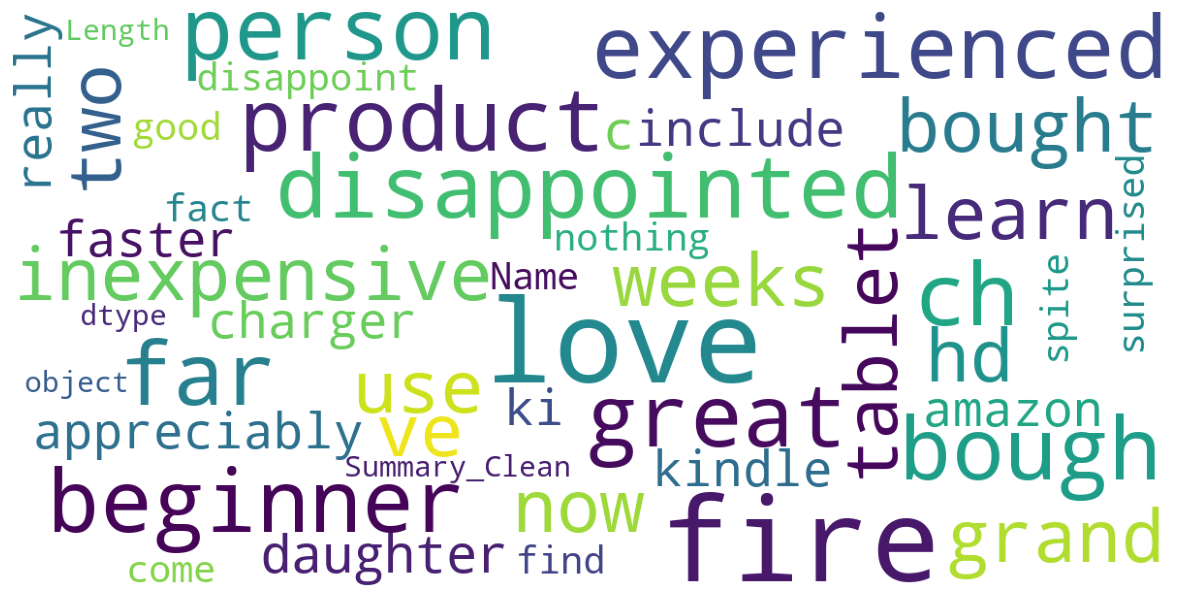

In [24]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
       
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(senti["Summary_Clean"])


### Wordcloud (Positive Words)

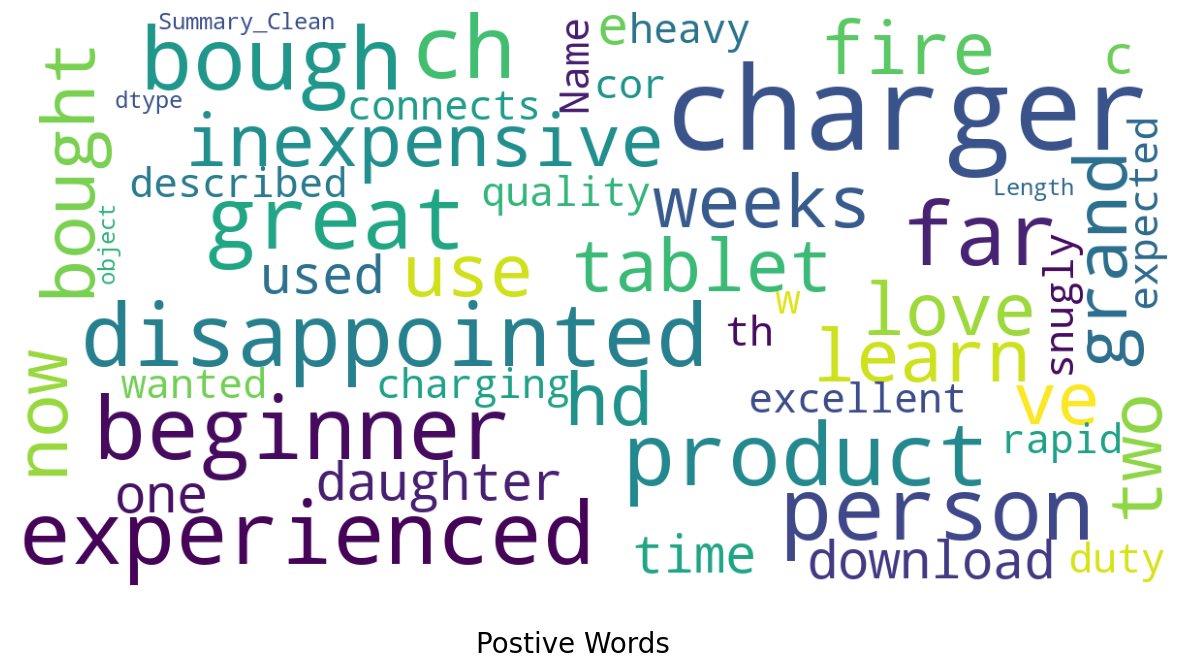

In [25]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "pos"] , title="Postive Words")

### Wordcloud (Negative Words)

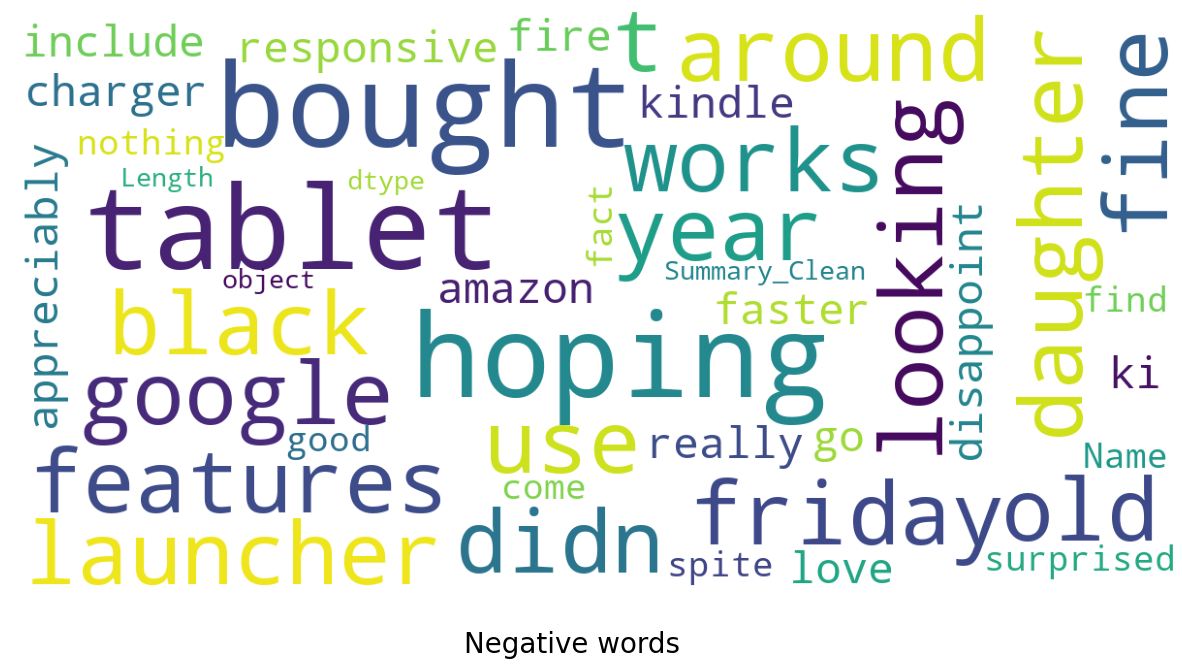

In [26]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "neg"] , title="Negative words")

### Precision Call Curve

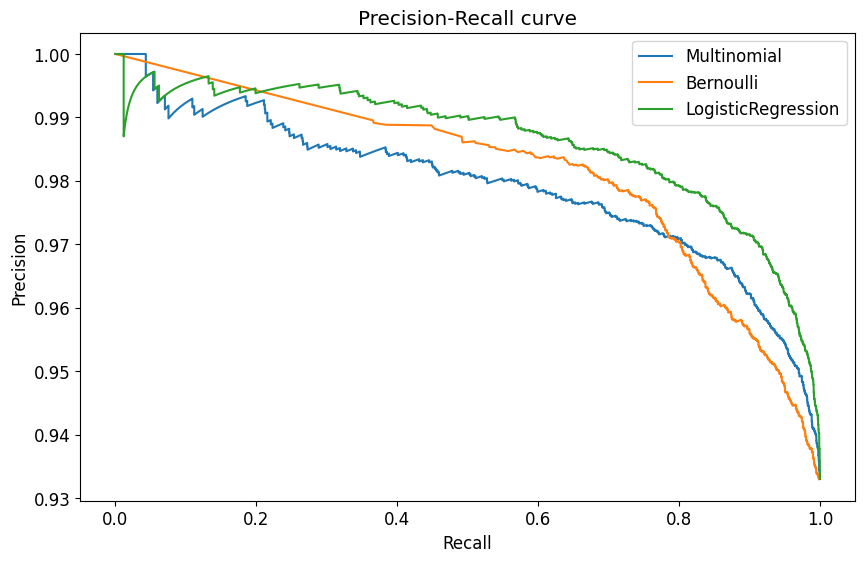

In [27]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 6))
for model, predicted in prediction.items():
    if model not in 'Naive':
        precision, recall, _ = precision_recall_curve(test["senti"].map(vfunc), predicted)
        plt.plot(recall, precision, label='%s' % model)

plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()


### Class Distribution

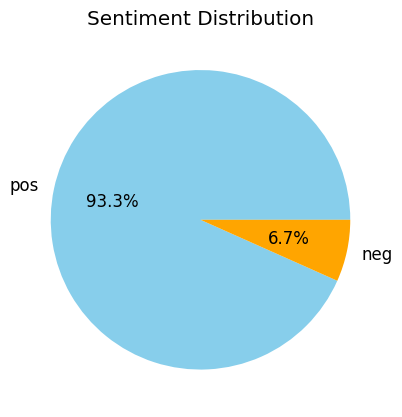

In [28]:
senti['senti'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()


### Feature Importance from Logistic Regression

In [29]:
top_positive = feature_coefs.sort_values(by='coef', ascending=False).head(10)
top_negative = feature_coefs.sort_values(by='coef', ascending=True).head(10)

print("Top Positive Features:\n", top_positive)
print("\nTop Negative Features:\n", top_negative)


Top Positive Features:
                 feature       coef
24303              love  27.140572
17859             great  18.503516
30972           perfect  17.632826
28400  not disappointed  16.208597
32876   probably wouldn  15.790211
12981         excellent  15.244342
3758               beat  14.762987
36866         satisfied  13.805606
11215              easy  13.770206
48857             worry  13.555902

Top Negative Features:
                feature       coef
42481         terrible -20.594314
48056  will definitely -19.756054
10647       done great -19.517477
38807             slow -18.868244
18450       great year -18.252242
36299        returning -17.754113
32515        price isn -16.594529
45887  using firestick -16.502729
36260           return -16.497557
16577       gift three -16.340094


### Learning Curve

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

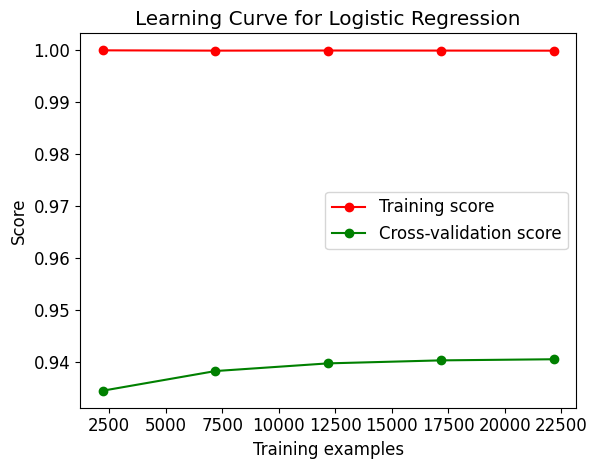

In [30]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(logreg, X_train_tfidf, train["senti"], cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()


### Model Calibration Curves

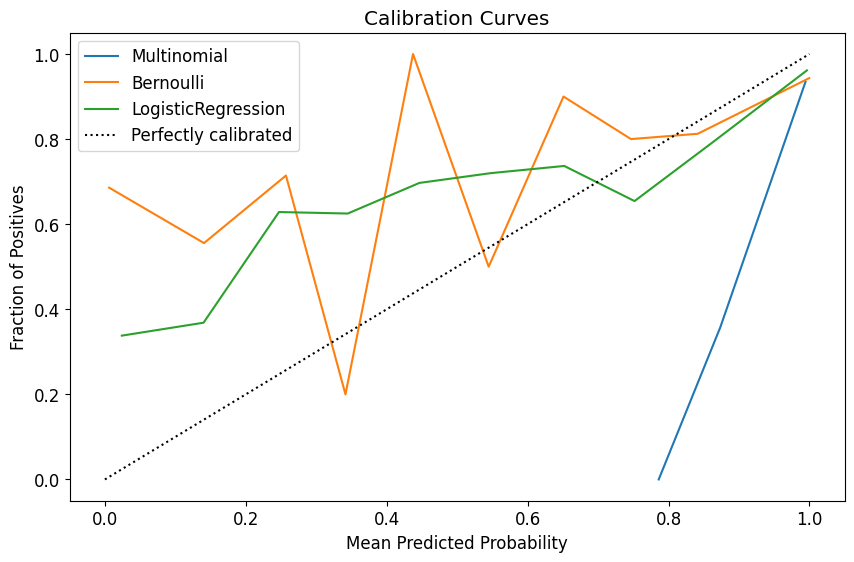

In [31]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 6))
for model_name, predicted in prediction.items():
    if model_name != 'Naive':
        true_prob, predicted_prob = calibration_curve(test["senti"].map(vfunc), predicted, n_bins=10)
        plt.plot(predicted_prob, true_prob, label='%s' % model_name)

plt.plot([0, 1], [0, 1], 'k:', label="Perfectly calibrated")
plt.title('Calibration Curves')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc="best")
plt.show()


### Class Imbalance Analysis

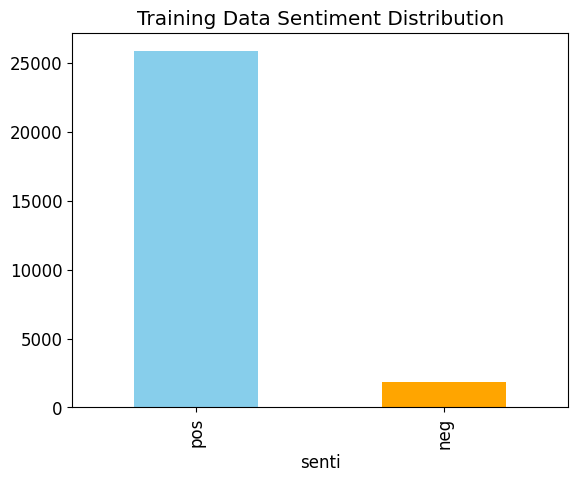

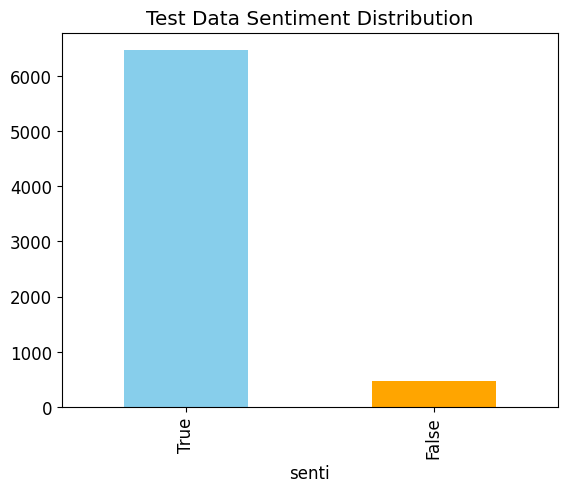

In [32]:
train['senti'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], title='Training Data Sentiment Distribution')
plt.show()

test['senti'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], title='Test Data Sentiment Distribution')
plt.show()


### Misclassification Analysis

In [33]:
# Identify misclassified examples for Logistic Regression
misclassified = test[test['senti'] != logreg.predict(X_test_tfidf)]

# Display a few misclassified examples
print("Misclassified Examples:")
print(misclassified[['Summary_Clean', 'senti']].head())


Misclassified Examples:
                                       Summary_Clean  senti
0  i ve had my fire hd two weeks now and i love i...   True
1  i bought this for my grand daughter when she c...   True
2  this amazon fire inch tablet is the perfect si...   True
3  the kindle is easiest to use graphics and scre...   True
4  i really like this tablet i would have given s...   True


### Feature Correlation Analysis

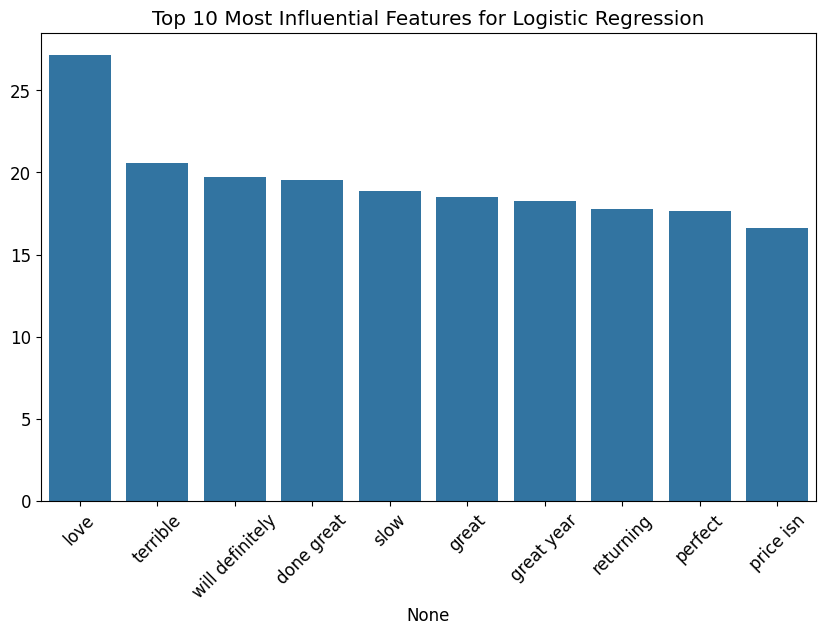

In [34]:
import seaborn as sns

# Get TF-IDF feature names and feature correlations for Logistic Regression
tfidf_feature_names = count_vect.get_feature_names_out()
logreg_feature_weights = pd.Series(logreg.coef_[0], index=tfidf_feature_names)

# Sort by absolute value to find most correlated features
top_correlated = logreg_feature_weights.abs().sort_values(ascending=False).head(10)

# Visualize feature correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlated.index, y=top_correlated.values)
plt.title("Top 10 Most Influential Features for Logistic Regression")
plt.xticks(rotation=45)
plt.show()


### Shapley Values for Feature Importance

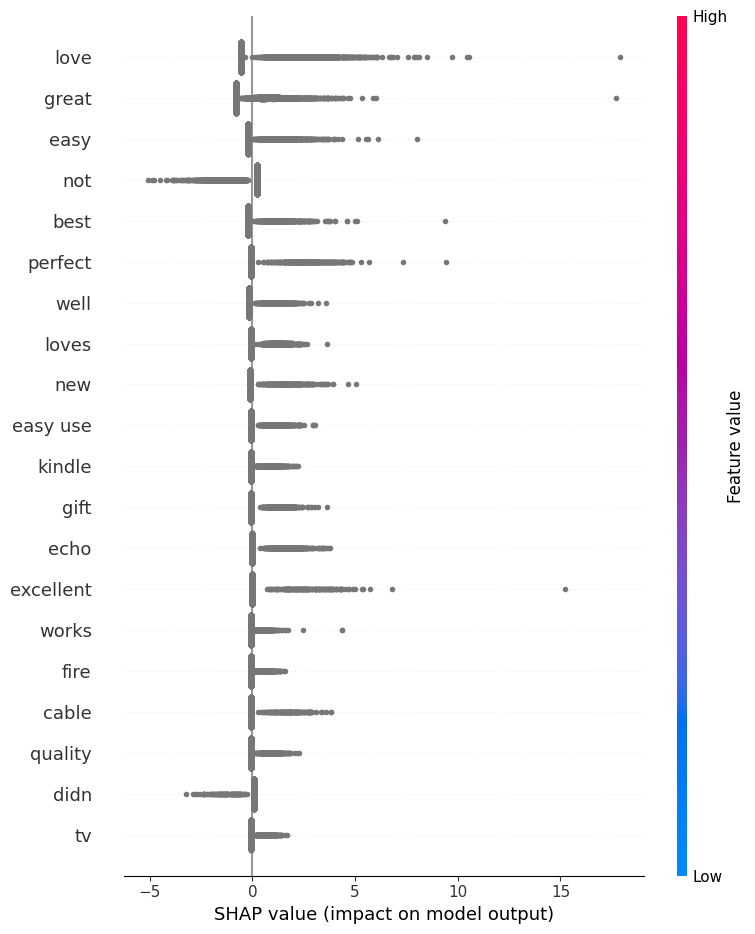

In [35]:
import shap

# Fit SHAP explainer for the Logistic Regression model
explainer = shap.LinearExplainer(logreg, X_train_tfidf)
shap_values = explainer.shap_values(X_test_tfidf)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_tfidf, feature_names=count_vect.get_feature_names_out())


### Error Analysis: Precision and Recall for Each Model

In [36]:
for key in ['Multinomial', 'Bernoulli', 'LogisticRegression']:
    print("Model: ", key)
    print(metrics.classification_report(test["senti"], prediction.get(key) > 0.5, target_names=["Negative", "Positive"]))
    print("\n")


Model:  Multinomial
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       464
    Positive       0.93      1.00      0.97      6461

    accuracy                           0.93      6925
   macro avg       0.47      0.50      0.48      6925
weighted avg       0.87      0.93      0.90      6925



Model:  Bernoulli
              precision    recall  f1-score   support

    Negative       0.33      0.17      0.23       464
    Positive       0.94      0.97      0.96      6461

    accuracy                           0.92      6925
   macro avg       0.63      0.57      0.59      6925
weighted avg       0.90      0.92      0.91      6925



Model:  LogisticRegression
              precision    recall  f1-score   support

    Negative       0.55      0.33      0.41       464
    Positive       0.95      0.98      0.97      6461

    accuracy                           0.94      6925
   macro avg       0.75      0.66      0.69      6925
weigh

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Accuracy

In [40]:
# Assuming 'pos' should map to True and 'neg' should map to False
y_pred_bool = [True if label == 'pos' else False for label in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_bool)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 93.68%
